# Group 7 - MediMart: Digital Pharmacy Inventory and Order Management System

Student 1: Deepshikha Soni

Student 2: Chandini Nekkanti

Steps performed in the implementation :

STEP 1 : SETTING UP MYSQL CONNECTION WITH PYTHON

STEP 2 : PERFORMING BASIC QUERIES IN PYTHON

STEP 3 : PLOTTING BASIC VISUALIZATION TO CHECK CONNECTION

STEP 4 : PERFORMING MEANING FULL QUERIES AND VISUALIZATIONS ON THOSE QUERIES

STEP 5 : PERFORMING MEANINGFULL QUERIES AND VISUALIZATIONS ON OUR SQL IMPLEMENTED QUERIES

STEP 6 : CURD OPERATIONS IN PYTHON AND TESTING THE MYSQL CONNECTION WITH PYTHON

In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing required python libraries
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#intiallize the attributes
db_name = "Medicart"
db_host = "localhost"
db_username = "root"
db_password = "Mysql@2023"

In [4]:
my_connection = pymysql.connect(host= db_host,
                                    port=int(3306),
                                    user=db_username,
                                    password = db_password,
                                    db = db_name)

In [5]:
#make the database connection
try :
    my_connection = pymysql.connect(host=db_host,
                                    port=int(3306),
                                    user='root',
                                    password = db_password,
                                    db = db_name)
except Exception as e:
    print(e)


In [6]:
if my_connection:
    print("Successfully connected to mysql database")
else:
    print("Error")

Successfully connected to mysql database


In [7]:
#Using python dataframe to read the data from tables

import warnings
warnings.filterwarnings('ignore')

data = pd.read_sql_query("SELECT * FROM cart", my_connection)

In [8]:
data.head()

,Cart_ID,Whislisted,Items,Delivery_date,Doc_ID,Patient_ID
0,S66401,"Yes, No",ARSENICUM METALLICUM,4/13/23,T2019XA,S5609
1,S82409M,"Yes, No",EROS EXPLORER,4/2/23,T38812,S81831
2,H7093,"Yes, No",Ofloxacin,11/29/22,S63496A,T23221D
3,M1213,"Yes, No",Cyclobenzaprine Hydrochloride,6/6/23,T511X4A,S5609
4,M80019D,"Yes, No",Male plus,4/1/23,M05671,S86011D


STEP 2 : PERFORMING BASIC QUERIES IN PYTHON

In [9]:
#Performing basic queries to check the connection
query = '''
SELECT p.Category_Name, SUM(py.Total_Amt) AS TotalSales
FROM product p
JOIN delivery d ON p.order_ID = d.order_ID
JOIN Payment py ON d.Order_ID = py.Order_ID
GROUP BY p.Category_Name
ORDER BY TotalSales DESC;
'''

data1 = pd.read_sql_query(query,my_connection)

print(data1)


  Category_Name  TotalSales
0   Antibiotics    47096.19
1   Painkillers    19223.43
2      Vitamins    12221.38


In [10]:
#Query 1 from my SQL Implementation
query1 = '''
SELECT p.Category_Name, COUNT(p.Product_ID) AS ProductCount
FROM Product p GROUP BY p.Category_Name;
'''

df1 = pd.read_sql_query(query1, my_connection)
df1

,Category_Name,ProductCount
0,Antibiotics,27
1,Vitamins,19
2,Painkillers,14


In [11]:
#Query 2 from my SQL Implementation
query2 = '''
SELECT p.Product_ID, p.Category_Name, p.manufacturer, SUM(p.Order_Quantity) AS TotalQuantitySold
FROM Product p
JOIN Ordered_from od ON p.Product_ID = od.Product_ID
GROUP BY p.Product_ID , p.Category_Name, p.manufacturer
ORDER BY TotalQuantitySold DESC
LIMIT 10; 
'''

df2 = pd.read_sql_query(query2, my_connection)
df2

,Product_ID,Category_Name,manufacturer,TotalQuantitySold
0,T82858S,Antibiotics,Uriel Pharmacy Inc.,564.0
1,B509,Antibiotics,"Physicians Total Care, Inc.",285.0
2,S72366C,Antibiotics,"A&Z Pharmaceutical, Inc.",120.0
3,V4311XS,Antibiotics,Walgreen Company,93.0
4,S52325Q,Antibiotics,REMEDYREPACK INC.,93.0
5,M9722,Painkillers,"Nelco Laboratories, Inc.",92.0
6,S02411G,Antibiotics,Wegman Food Markets Inc,90.0
7,T17910,Vitamins,Cantrell Drug Company,83.0
8,T24599,Antibiotics,"Otsuka America Pharmaceutical, Inc.",83.0
9,S233XXS,Antibiotics,"Dolgencorp, LLC",82.0


In [12]:
#Query 3 from my SQL Implementation
query3 = '''
select d.Order_ID, d.Order_Date, p.Product_ID, p.Order_Quantity, p.Prod_cost, pa.Patient_ID, pa.Patient_Name, pa.Insurance_No
FROM delivery d
JOIN Patient pa ON d.patient_ID = pa.patient_ID
JOIN Product p ON d.Order_ID = p.Order_ID; 
'''

df3 = pd.read_sql_query(query3, my_connection)
df3

,Order_ID,Order_Date,Product_ID,Order_Quantity,Prod_cost,Patient_ID,Patient_Name,Insurance_No
0,H7101,8/16/23,S3217XB,49,"$2,231.66",S82854J,Kipp,M80062D
1,M84759S,5/31/23,T17910,83,"$2,420.70",A59,Duncan,S72101B
2,H7101,8/16/23,S01101A,25,"$2,254.35",S82854J,Kipp,M80062D
3,H7101,8/16/23,S53441A,80,"$2,969.92",S82854J,Kipp,M80062D
4,S82822K,11/1/23,S72136B,73,"$3,723.32",S79002G,Shelba,M216X9
5,V55,3/23/23,Q6111,25,"$2,730.83",Q30,Win,Y00XXXS
6,V272,6/15/23,O6013X1,78,"$1,162.66",T23221D,Rani,S62347B
7,M21961,8/19/23,S59002A,10,"$1,670.21",S5609,Tove,S72462H
8,O9984,6/17/23,T485X5D,26,"$3,135.25",S86011D,Caleb,T22099
9,S92065A,8/10/23,S63112,76,"$3,009.72",S96802D,Elysia,T23102A


In [13]:
#Query 4 from my SQL Implementation
query4 = '''
SELECT d.Order_ID, d.Order_Date, d.Patient_ID, pa.Patient_name, p.Payment_Status
FROM delivery d
JOIN patient pa ON d.Patient_ID = pa.Patient_ID
JOIN Payment p ON d.Order_ID = p.Order_ID 
WHERE p.Payment_Status in ('Failed', 'Pending');
'''

df4 = pd.read_sql_query(query4, my_connection)
df4

,Order_ID,Order_Date,Patient_ID,Patient_name,Payment_Status
0,S82822K,11/1/23,S79002G,Shelba,Pending
1,V0210XA,5/26/23,Q30,Win,Failed
2,T24402,3/23/23,Q30,Win,Failed
3,V55,3/23/23,Q30,Win,Failed
4,V272,6/15/23,T23221D,Rani,Failed
5,M21961,8/19/23,S5609,Tove,Pending
6,O9984,6/17/23,S86011D,Caleb,Pending
7,T881,3/8/23,T382X1,Papageno,Failed
8,O411425,1/3/23,M85479,Wallas,Failed
9,T20419A,1/30/23,Z818,Roch,Failed


In [14]:
#Query 5 from my SQL Implementation
query5 = '''
SELECT Order_ID, Order_Date, Patient_ID, shop_id
FROM delivery
ORDER BY Order_Date DESC
LIMIT 10;
'''

df5 = pd.read_sql_query(query5, my_connection)
df5

,Order_ID,Order_Date,Patient_ID,shop_id
0,M21961,8/19/23,S5609,S66517D
1,H7101,8/16/23,S82854J,H1022
2,S51002D,8/12/23,T2176XS,S82011P
3,S92065A,8/10/23,S96802D,S72309F
4,S93504S,8/10/23,H26049,S63043S
5,Z053,7/13/23,T471X,T2019XA
6,O9984,6/17/23,S86011D,S06827S
7,V272,6/15/23,T23221D,S72019
8,S12650G,5/6/23,S52309,S66517D
9,M84759S,5/31/23,A59,S72309F


In [15]:
#Query 6 from my SQL Implementation
query6 = '''
SELECT e.EMP_ID, e.EMP_Name, e.Shop_ID, COUNT(d.Order_ID) AS NumberOfOrders
FROM Employees e
JOIN delivery d on e.EMP_ID = d.EMP_ID
GROUP BY e.EMP_ID, e.EMP_Name, e.shop_ID
HAVING COUNT(d.Order_ID) = (
SELECT COUNT(Order_ID) AS MaxOrders
FROM delivery
GROUP BY EMP_ID
ORDER BY MaxOrders DESC
LIMIT 1);
'''

df6 = pd.read_sql_query(query6, my_connection)
df6

,EMP_ID,EMP_Name,Shop_ID,NumberOfOrders
0,S0027,Dawna,T83128A,3
1,S4900,Toinette,O7189,3
2,S42294,Beverie,V245XXD,3


In [16]:
#Query 7 from my SQL Implementation
query7 = '''
SELECT distinct(d.Patient_ID), d.Shop_ID, p.Product_ID, p.Category_Name, MAX(d.Order_Date) AS LatestOrderDate
FROM delivery d
JOIN Product p ON d.Order_ID = p.Order_ID
GROUP BY Patient_ID, d.Shop_ID, p.Product_ID, p.Category_Name
'''

df7 = pd.read_sql_query(query7, my_connection)
df7

,Patient_ID,Shop_ID,Product_ID,Category_Name,LatestOrderDate
0,S82854J,H1022,S3217XB,Antibiotics,8/16/23
1,A59,S72309F,T17910,Vitamins,5/31/23
2,S82854J,H1022,S01101A,Painkillers,8/16/23
3,S82854J,H1022,S53441A,Painkillers,8/16/23
4,S79002G,S66517D,S72136B,Antibiotics,11/1/23
5,Q30,S76012A,Q6111,Antibiotics,3/23/23
6,T23221D,S72019,O6013X1,Vitamins,6/15/23
7,S5609,S66517D,S59002A,Vitamins,8/19/23
8,S86011D,S06827S,T485X5D,Antibiotics,6/17/23
9,S96802D,S72309F,S63112,Antibiotics,8/10/23


In [17]:
#Query 8 from my SQL Implementation
query8 = '''
SELECT p.Category_Name, SUM(py.Total_Amt) AS TotalSales
FROM Product p
JOIN delivery d ON p.order_ID = d.order_ID
JOIN payment py ON d.order_ID = py.order_ID 
GROUP BY p.Category_Name
ORDER BY Totalsales DESC;
'''

df8 = pd.read_sql_query(query8, my_connection)
df8

,Category_Name,TotalSales
0,Antibiotics,47096.19
1,Painkillers,19223.43
2,Vitamins,12221.38


STEP 3 : PLOTTING BASIC VISUALIZATION TO CHECK CONNECTION

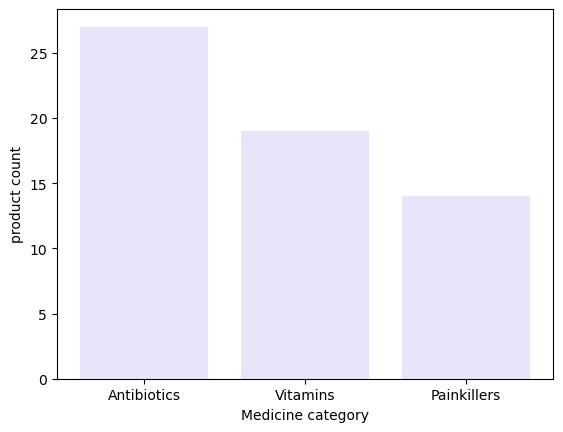

In [18]:
#Using Matplotlib library to plot basic queries

import matplotlib.pyplot as plt

query = '''SELECT p.Category_Name, COUNT(p.Product_ID) AS ProductCount
           FROM Product p GROUP BY p.Category_Name'''

data2 = pd.read_sql_query(query, my_connection)
data2


category = []
Product_counts = []

for index, row in data2.iterrows():
    category.append(row['Category_Name'])
    Product_counts.append(row['ProductCount'])

plt.bar(category, Product_counts ,  color= 'lavender')
plt.xlabel('Medicine category')
plt.ylabel('product count')
plt.show()

In [19]:
# Using cursur to execute the queries

cursor = my_connection.cursor()

In [20]:
cursor.execute("SELECT Product_ID, Category_name, Brand, Prod_cost FROM product p")

for record in cursor:
    print(record)

('S72366C', 'Antibiotics', 'Children Acetaminophen', '$4,051.19 ')
('V4311XS', 'Antibiotics', 'Wal fex Allergy', '$1,404.42 ')
('T7849', 'Vitamins', 'Pollens - Weeds and Garden Plants, Scale, Wing (Shad) Atriplex canescens', '$383.13 ')
('M1A049', 'Vitamins', 'Mephyton', '$3,704.90 ')
('B509', 'Antibiotics', 'Adapalene', '$3,555.74 ')
('S60442D', 'Vitamins', 'Good Neighbor Pharmacy Hemorrhoidal', '$2,913.95 ')
('H18443', 'Painkillers', 'SHISEIDO SUNCARE ULTIMATE', '$447.23 ')
('Z8613', 'Antibiotics', 'Clamue Healthy Fresh BB Cream Light', '$1,812.25 ')
('T3273', 'Painkillers', 'Lisinopril', '$3,330.57 ')
('S3217XB', 'Antibiotics', 'Sun Shades Lip Balm', '$2,231.66 ')
('S46092S', 'Vitamins', 'DIPYRIDAMOLE', '$1,728.96 ')
('O328XX1', 'Antibiotics', 'Virginia Live Oak', '$3,567.11 ')
('S60922', 'Antibiotics', 'Anectine', '$2,208.33 ')
('S93114D', 'Vitamins', 'Bethanechol Chloride', '$2,491.05 ')
('T65291A', 'Vitamins', 'XARELTO', '$367.08 ')
('T17910', 'Vitamins', 'Fentanyl Citrate', '$2,

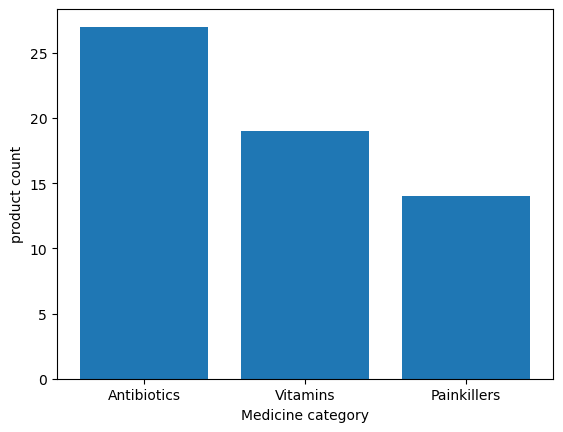

In [21]:
#Implementing same query using cursor
cursor.execute("SELECT p.Category_Name, COUNT(p.Product_ID) AS ProductCount FROM Product p GROUP BY p.Category_Name")

category = []
Product_counts = []

for record in cursor:
    category.append(record[0])
    Product_counts.append(record[1])

plt.bar(category, Product_counts)
plt.xlabel('Medicine category')
plt.ylabel('product count')
plt.show()

STEP 4 : PERFORMING MEANINGFULL VISUALIZATIONS ON SOME QUERIES

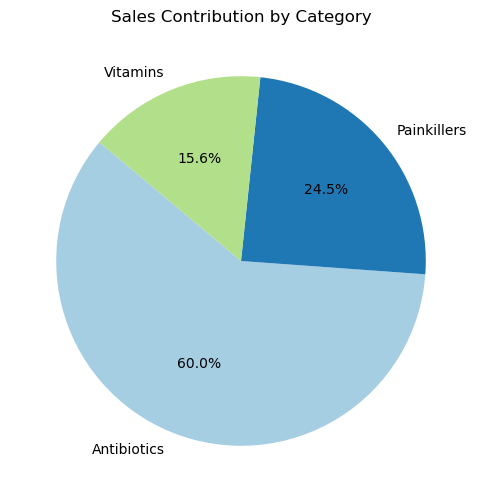

In [22]:
#TOTAL SALES CONTRIBUTION BY CATEGORY

query = '''
SELECT p.Category_Name, SUM(py.Total_Amt) AS TotalSales
FROM product p
JOIN delivery d ON p.order_ID = d.order_ID
JOIN Payment py ON d.Order_ID = py.Order_ID
GROUP BY p.Category_Name
ORDER BY TotalSales DESC;
'''

data4 = pd.read_sql_query(query, my_connection)

plt.figure(figsize=(6, 6))
plt.pie(data4['TotalSales'], labels=data4['Category_Name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Contribution by Category')
plt.show()


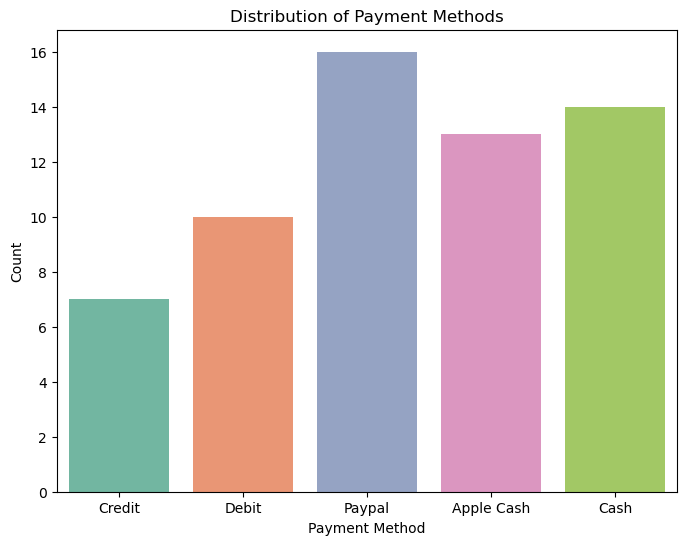

In [23]:
payment_data = pd.read_sql_query("SELECT Payment_Method, COUNT(*) AS Count FROM Payment GROUP BY Payment_Method", my_connection)

plt.figure(figsize=(8, 6))
sns.barplot(x='Payment_Method', y='Count', data=payment_data, palette='Set2')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods')
plt.show()


In [24]:
!pip install squarify

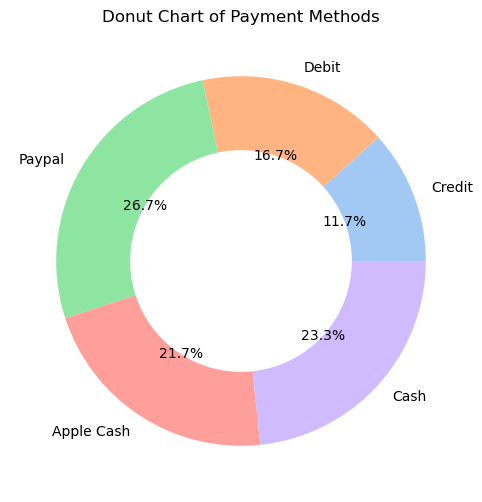

In [25]:
# Create a dataframe with payment method counts
payment_counts = pd.read_sql_query("SELECT Payment_Method, COUNT(*) AS Count FROM Payment GROUP BY Payment_Method", my_connection)

# Plot a donut chart
plt.figure(figsize=(8,6))
plt.pie(payment_counts['Count'], labels=payment_counts['Payment_Method'], autopct='%1.1f%%', colors=sns.color_palette('pastel', n_colors=len(payment_counts)), wedgeprops=dict(width=0.4))
plt.title('Donut Chart of Payment Methods')
plt.show()


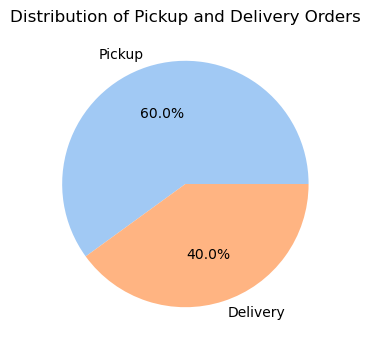

In [26]:
# Create a dataframe with counts of pickup and delivery orders
order_counts = pd.read_sql_query("SELECT 'Pickup' AS Order_Type, COUNT(*) AS Count FROM pickup " 
                                  "UNION ALL " 
                                  "SELECT 'Delivery' AS Order_Type, COUNT(*) AS Count FROM delivery", my_connection)

# Plot a pie chart
plt.figure(figsize=(6,4))
plt.pie(order_counts['Count'], labels=order_counts['Order_Type'], autopct='%1.1f%%', colors=sns.color_palette('pastel', n_colors=len(order_counts)))
plt.title('Distribution of Pickup and Delivery Orders')
plt.show()


STEP 5 : PERFORMING MEANINGFULL QUERIES AND VISUALIZATIONS ON OUR SQL IMPLEMENTED QUERIES

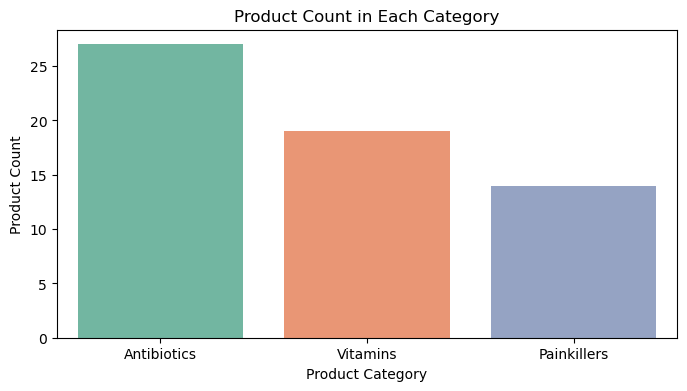

In [27]:
# 1. Bar Plot for Product Count in Each Category
query1 = '''
SELECT p.Category_Name, COUNT(p.Product_ID) AS ProductCount
FROM Product p GROUP BY p.Category_Name;
'''

data1 = pd.read_sql_query(query1, my_connection)

plt.figure(figsize=(8,4))
sns.barplot(x='Category_Name', y='ProductCount', data=data1, palette='Set2')
plt.xlabel('Product Category')
plt.ylabel('Product Count')
plt.title('Product Count in Each Category')
plt.show()

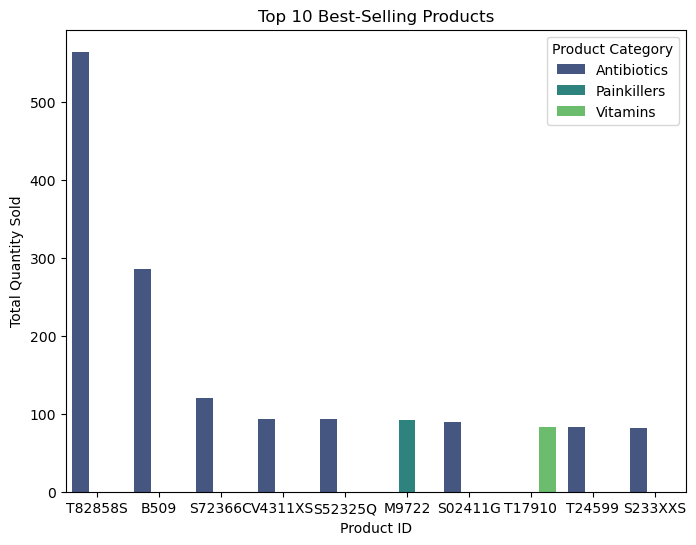

In [28]:
# 2. Bar Plot for Top 10 Best-Selling Products
query2 = '''
SELECT p.Product_ID, p.Category_Name, p.manufacturer, SUM(p.Order_Quantity) AS TotalQuantitySold
FROM Product p
JOIN Ordered_from od ON p.Product_ID = od.Product_ID
GROUP BY p.Product_ID , p.Category_Name, p.manufacturer
ORDER BY TotalQuantitySold DESC
LIMIT 10;
'''

data2 = pd.read_sql_query(query2, my_connection)

plt.figure(figsize=(8,6))
sns.barplot(x='Product_ID', y='TotalQuantitySold', hue='Category_Name', data=data2, palette='viridis')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.legend(title='Product Category')
plt.show()

Rows with non-numeric values:
  Order_ID Order_Date Product_ID  Order_Quantity   Prod_cost Patient_ID  \
0    H7101    8/16/23    S3217XB              49  $2,231.66     S82854J   
1  M84759S    5/31/23     T17910              83  $2,420.70         A59   
2    H7101    8/16/23    S01101A              25  $2,254.35     S82854J   
3    H7101    8/16/23    S53441A              80  $2,969.92     S82854J   
4  S82822K    11/1/23    S72136B              73  $3,723.32     S79002G   
5      V55    3/23/23      Q6111              25  $2,730.83         Q30   
6     V272    6/15/23    O6013X1              78  $1,162.66     T23221D   
7   M21961    8/19/23    S59002A              10  $1,670.21       S5609   

  Patient_Name Insurance_No  
0         Kipp      M80062D  
1       Duncan      S72101B  
2         Kipp      M80062D  
3         Kipp      M80062D  
4       Shelba       M216X9  
5          Win      Y00XXXS  
6         Rani      S62347B  
7         Tove      S72462H  


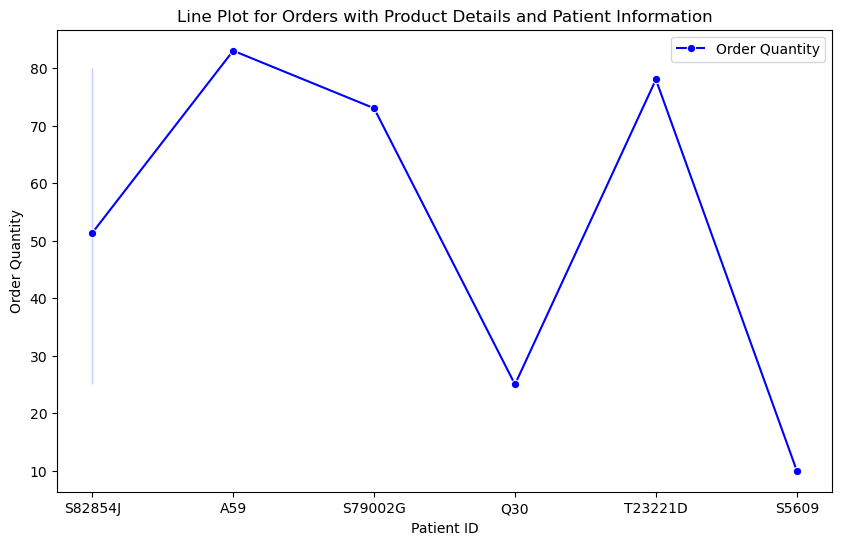

In [29]:
# Query:3 to retrieve orders with product details and patient information : 
query3 = '''
SELECT d.Order_ID, d.Order_Date, p.Product_ID, p.Order_Quantity, p.Prod_cost, pa.Patient_ID, pa.Patient_Name, pa.Insurance_No
FROM delivery d
JOIN Patient pa ON d.patient_ID = pa.patient_ID
JOIN Product p ON d.Order_ID = p.Order_ID
LIMIT 8;
'''

# Execute the query and read data into a DataFrame
data3 = pd.read_sql_query(query3, my_connection)

# Display the DataFrame
print("Rows with non-numeric values:")
print(data3)

# Plot a line plot based on the data
if not data3.empty:
    plt.figure(figsize=(10, 6))
    
    # Use seaborn.lineplot for a line plot
    sns.lineplot(x='Patient_ID', y='Order_Quantity', data=data3, marker='o', color='b', label='Order Quantity')
    
    plt.xlabel('Patient ID')
    plt.ylabel('Order Quantity')
    plt.title('Line Plot for Orders with Product Details and Patient Information')
    plt.legend()  # Add a legend for clarity
    plt.show()
else:
    print("The data is empty. Please check your query.")



Rows with non-numeric values:
   Order_ID Order_Date Patient_ID Patient_name Payment_Status
0   S82822K    11/1/23    S79002G       Shelba        Pending
1   V0210XA    5/26/23        Q30          Win         Failed
2    T24402    3/23/23        Q30          Win         Failed
3       V55    3/23/23        Q30          Win         Failed
4      V272    6/15/23    T23221D         Rani         Failed
5    M21961    8/19/23      S5609         Tove        Pending
6     O9984    6/17/23    S86011D        Caleb        Pending
7      T881     3/8/23     T382X1     Papageno         Failed
8   O411425     1/3/23     M85479       Wallas         Failed
9   T20419A    1/30/23       Z818         Roch         Failed
10    H7101    8/16/23    S82854J         Kipp        Pending
11  S51002D    8/12/23    T2176XS         Doll        Pending
12  S12650G     5/6/23     S52309      Darleen        Pending
13  S52242M   12/23/22    S96802D       Elysia        Pending
14  V9226XS    1/29/23    S96802D       

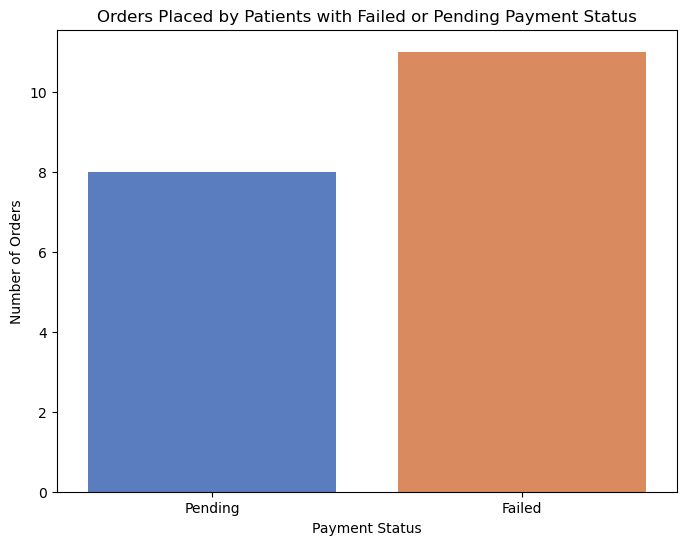

In [30]:
# Query: 4 to retrieve orders placed by patients with failed or pending payment status
query4 = '''
SELECT d.Order_ID, d.Order_Date, d.Patient_ID, pa.Patient_name, p.Payment_Status
FROM delivery d
JOIN patient pa ON d.Patient_ID = pa.Patient_ID
JOIN Payment p ON d.Order_ID = p.Order_ID 
WHERE p.Payment_Status IN ('Failed', 'Pending')
'''

# Execute the query and read data into a DataFrame
data4 = pd.read_sql_query(query4, my_connection)

# Display the DataFrame
print("Rows with non-numeric values:")
print(data4)

# Plot the bar plot if data is not empty
if not data4.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Payment_Status', data=data4, palette='muted')
    plt.xlabel('Payment Status')
    plt.ylabel('Number of Orders')
    plt.title('Orders Placed by Patients with Failed or Pending Payment Status')
    plt.show()
else:
    print("The data is empty. Please check your query.")

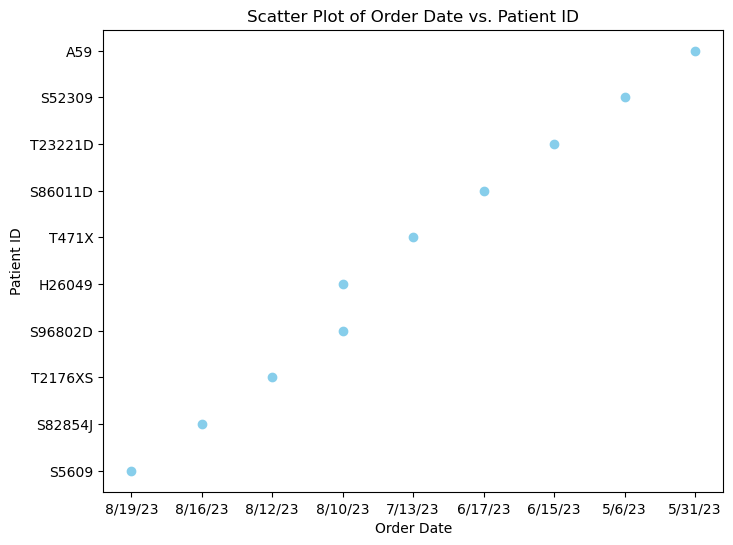

In [31]:
# Query : 5 Retrieve Top 10 Most Recent Orders:
query5 = '''
SELECT Order_ID, Order_Date, Patient_ID, shop_id
FROM delivery
ORDER BY Order_Date DESC
LIMIT 10;
'''

data5 = pd.read_sql_query(query5, my_connection)

plt.figure(figsize=(8, 6))
plt.scatter(data5['Order_Date'], data5['Patient_ID'], color='skyblue', marker='o')
plt.xlabel('Order Date')
plt.ylabel('Patient ID')
plt.title('Scatter Plot of Order Date vs. Patient ID')
plt.show()


Rows with non-numeric values:
   EMP_ID  EMP_Name  Shop_ID  NumberOfOrders
0   S0027     Dawna  T83128A               3
1   S4900  Toinette    O7189               3
2  S42294   Beverie  V245XXD               3


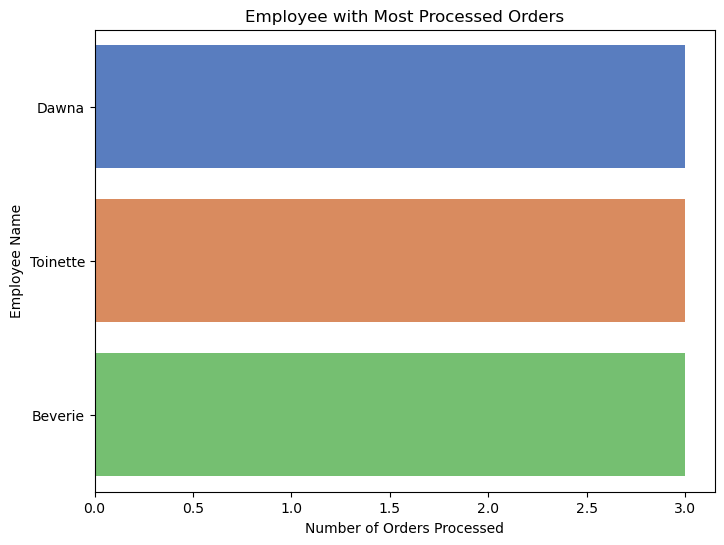

In [32]:
#Query 6 : Retrieve the Employee who have processed the Most Orders:
query6 = '''
SELECT e.EMP_ID, e.EMP_Name, e.Shop_ID, COUNT(d.Order_ID) AS NumberOfOrders
FROM Employees e
JOIN delivery d on e.EMP_ID = d.EMP_ID
GROUP BY e.EMP_ID, e.EMP_Name, e.shop_ID
HAVING COUNT(d.Order_ID) = (
    SELECT COUNT(Order_ID) AS MaxOrders
    FROM delivery
    GROUP BY EMP_ID
    ORDER BY MaxOrders DESC
    LIMIT 1
)
'''

# Execute the query and read data into a DataFrame
data6 = pd.read_sql_query(query6, my_connection)

# Display the DataFrame
print("Rows with non-numeric values:")
print(data6)

# Plot the bar plot if data is not empty
if not data6.empty:
    plt.figure(figsize=(8,6))
    sns.barplot(x='NumberOfOrders', y='EMP_Name', data=data6, palette='muted')
    plt.xlabel('Number of Orders Processed')
    plt.ylabel('Employee Name')
    plt.title('Employee with Most Processed Orders')
    plt.show()
else:
    print("The data is empty. Please check your query.")

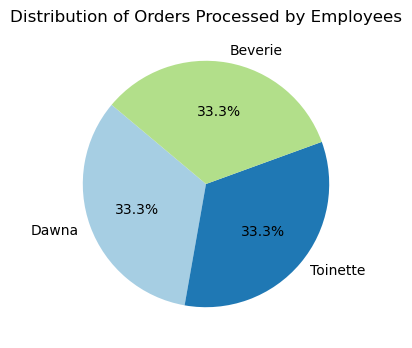

In [33]:
plt.figure(figsize=(6,4))
plt.pie(data6['NumberOfOrders'], labels=data6['EMP_Name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Orders Processed by Employees')
plt.show()


Rows with non-numeric values:
   Patient_ID  Shop_ID Product_ID Category_Name LatestOrderDate
0     S82854J    H1022    S3217XB   Antibiotics         8/16/23
1         A59  S72309F     T17910      Vitamins         5/31/23
2     S82854J    H1022    S01101A   Painkillers         8/16/23
3     S82854J    H1022    S53441A   Painkillers         8/16/23
4     S79002G  S66517D    S72136B   Antibiotics         11/1/23
5         Q30  S76012A      Q6111   Antibiotics         3/23/23
6     T23221D   S72019    O6013X1      Vitamins         6/15/23
7       S5609  S66517D    S59002A      Vitamins         8/19/23
8     S86011D  S06827S    T485X5D   Antibiotics         6/17/23
9     S96802D  S72309F     S63112   Antibiotics         8/10/23
10        A59  S72309F     I83218   Painkillers         5/31/23
11       Z818  S66517D       V404   Antibiotics         1/30/23
12    S82854J    H1022    S52325Q   Antibiotics         8/16/23
13     S52309  S66517D      V5959   Painkillers          5/6/23
14    S968

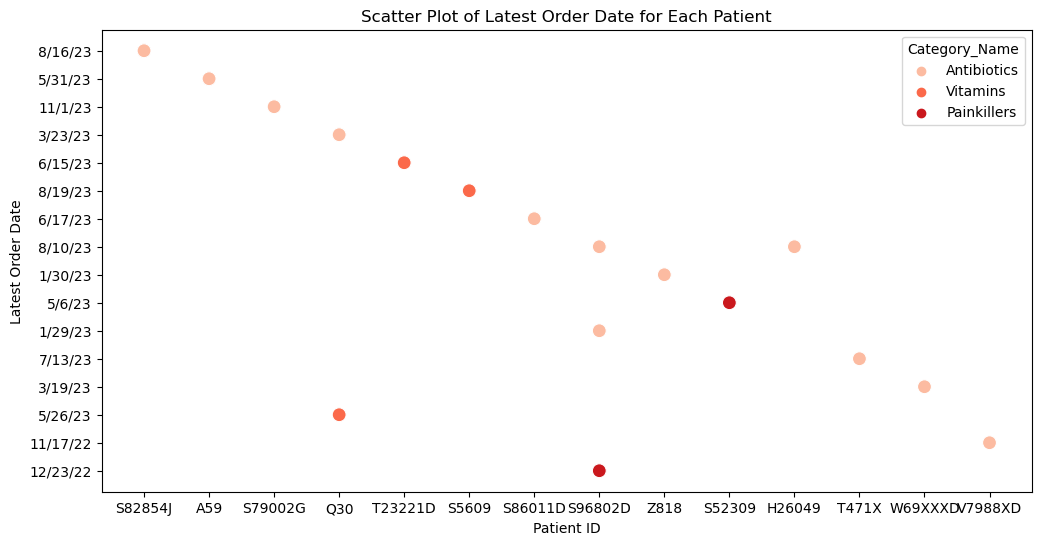

In [34]:
#Query 7: Retrieve the Latest Order for Each Patient:
query7 = '''
SELECT DISTINCT(d.Patient_ID), d.Shop_ID, p.Product_ID, p.Category_Name, MAX(d.Order_Date) AS LatestOrderDate
FROM delivery d
JOIN Product p ON d.Order_ID = p.Order_ID
GROUP BY Patient_ID, d.Shop_ID, p.Product_ID, p.Category_Name
'''

# Execute the query and read data into a DataFrame
data7 = pd.read_sql_query(query7, my_connection)

# Display the DataFrame
print("Rows with non-numeric values:")
print(data7)

# Plot the count plot if data is not empty
plt.figure(figsize=(12,6))
sns.scatterplot(x='Patient_ID', y='LatestOrderDate', hue='Category_Name', data=data7, palette='Reds', s=100)
plt.xlabel('Patient ID')
plt.ylabel('Latest Order Date')
plt.title('Scatter Plot of Latest Order Date for Each Patient')
plt.show()

Rows with non-numeric values:
  Category_Name  TotalSales
0   Antibiotics    47096.19
1   Painkillers    19223.43
2      Vitamins    12221.38


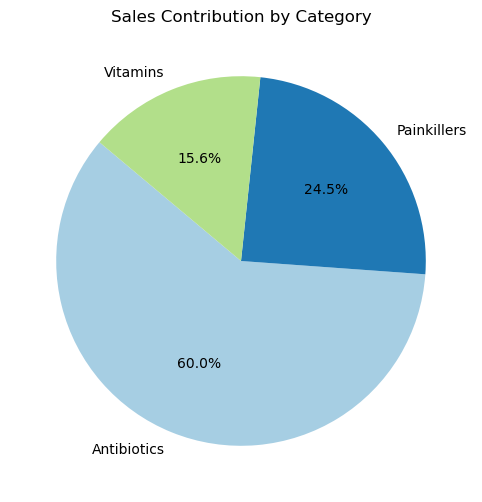

In [35]:
# Query 8: Retrieve Total Sales Amount for Each Category:
query8 = '''
SELECT p.Category_Name, SUM(py.Total_Amt) AS TotalSales
FROM Product p
JOIN delivery d ON p.order_ID = d.order_ID
JOIN payment py ON d.order_ID = py.order_ID 
GROUP BY p.Category_Name
ORDER BY TotalSales DESC
'''

# Execute the query and read data into a DataFrame
data8 = pd.read_sql_query(query8, my_connection)

# Display the DataFrame
print("Rows with non-numeric values:")
print(data8)

# Plot the bar plot if data is not empty
plt.figure(figsize=(8, 6))
plt.pie(data8['TotalSales'], labels=data8['Category_Name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Contribution by Category')
plt.show()

STEP 6 : CURD OPERATIONS IN PYTHON AND TESTING THE MYSQL CONNECTION WITH PYTHON

Inserting Values in python in the MYSQL database

In [36]:
# Create a cursor object
cursor2 = my_connection.cursor()

# Define the SQL query to insert values into the table
sql = "INSERT INTO MEDICAL (Shop_ID, Shop_add, Shop_name, Shop_fax, User_ID) VALUES (%s, %s, %s, %s, %s)"

# Define the values to insert into the table
val = ("1S21361D", "Suite 99", "Anapurna store" , "#c892gr","S63335P")

# Execute the SQL query and commit the changes to the database
cursor2.execute(sql, val)
my_connection.commit()

print(cursor2.rowcount, "record inserted.")

1 record inserted.
